# Action1：使用Pytorch编写神经网络，完成boston房价预测问题


In [165]:
from sklearn.datasets import load_boston
# 数据加载
data = load_boston()
x = data['data']
y = data['target']

In [166]:
x.shape

(506, 13)

In [167]:
y.shape

(506,)

In [168]:
# 重新整理y形状，这里y本身就是1列的，不需要reshape了
# y.reshape(-1,1)
# y.shape

In [169]:
# 数据规范化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [171]:
import torch
# 数据转换ndarray-->Tensor
x = torch.from_numpy(x).type(torch.FloatTensor)
y = torch.from_numpy(y).type(torch.FloatTensor)
x.type() # torch推荐使用.type()方法，type(x)这样用会直接输出tensor而不是FloatTensor

'torch.FloatTensor'

In [172]:
# 数据切分
from sklearn.model_selection import train_test_split

In [173]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.2)

In [174]:
# 构造neural network
from torch import nn

In [175]:
model = nn.Sequential(
        nn.Linear(13,20),
        nn.ReLU(), # 大写注意
        nn.Linear(20,1)
)

In [176]:
# 优化器和损失函数
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01) # 0.001和0.01常用,model.parameters()注意括号

In [177]:
# 训练
epoch = 300
iter_loss = []
for i in range(epoch):
    # 前向传播
    y_pred = model(train_x)
    # 计算loss
    loss = criterion(y_pred, train_y)
    print(i,loss.item())
    iter_loss.append(loss.item())
    # 清空梯度，torch特别的地方
    optimizer.zero_grad()
    # 反向传播
    loss.backward()
    # 权重调整
    optimizer.step()

D:\Program Files\Anaconda3\envs\Pytorch\lib\site-packages\torch\nn\modules\loss.py:432: UserWarning: Using a target size (torch.Size([404])) that is different to the input size (torch.Size([404, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0 609.9312133789062
1 605.514892578125
2 601.290283203125
3 597.1929931640625
4 593.0210571289062
5 588.6134643554688
6 583.9528198242188
7 579.01904296875
8 573.7501220703125
9 568.0833740234375
10 561.983154296875
11 555.43115234375
12 548.419677734375
13 540.944580078125
14 533.0045166015625
15 524.6001586914062
16 515.7337646484375
17 506.4100646972656
18 496.6357116699219
19 486.4201965332031
20 475.7751770019531
21 464.7149353027344
22 453.2569885253906
23 441.42132568359375
24 429.2308044433594
25 416.7118835449219
26 403.8935546875
27 390.80828857421875
28 377.4916076660156
29 363.9820251464844
30 350.32135009765625
31 336.5543518066406
32 322.7284240722656
33 308.8939514160156
34 295.1036071777344
35 281.4122619628906
36 267.8765869140625
37 254.55474853515625
38 241.5059051513672
39 228.78955078125
40 216.46490478515625
41 204.5902557373047
42 193.22215270996094
43 182.4144287109375
44 172.21734619140625
45 162.6763916015625
46 153.8314208984375
47 145.71539306640625
48 138.3

In [181]:
# 测试
output = model(test_x)
predict_list = output.detach().numpy() # detach从最近的graph中分离tensor，Can't call numpy() on Variable that requires grad. Use var.detach().numpy() instead
predict_list[:10]

array([[23.426916],
       [21.707548],
       [18.678255],
       [20.546831],
       [21.504692],
       [22.91509 ],
       [25.005516],
       [18.825909],
       [24.680193],
       [19.512232]], dtype=float32)

In [182]:
test_y[:10]

tensor([19.3000, 30.1000, 22.8000, 14.5000, 36.0000, 37.6000, 18.5000, 15.6000,
         8.1000, 35.1000])

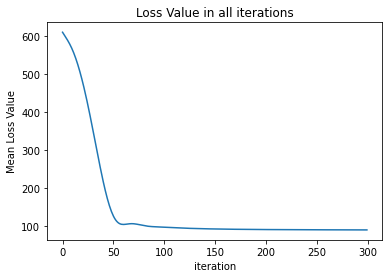

In [183]:
# 绘制不同iteration的loss
import matplotlib.pyplot as plt
import numpy as np
plot_x = np.arange(epoch)
plot_y = np.array(iter_loss)
plt.plot(plot_x,plot_y)
plt.title('Loss Value in all iterations')
plt.xlabel('iteration') #迭代次数
plt.ylabel('Mean Loss Value')
plt.show()

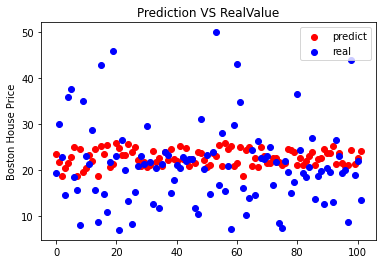

In [184]:
# 查看真实值与与测试的散点图
scatter_x = np.arange(test_x.shape[0])
y1 = np.array(predict_list) # 预测值
y2 = np.array(test_y) # 真实值
line1 = plt.scatter(scatter_x , y1, c = 'red')
line2 = plt.scatter(scatter_x , y2 , c = 'blue')
plt.legend([line1,line2],['predict','real'])  # 图例
plt.title('Prediction VS RealValue')
plt.ylabel('Boston House Price')
plt.show()